In [1]:
# pour activer l'accès au drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Bidirectional, GRU, Dropout
from tensorflow.keras.utils import to_categorical
from scipy.stats import norm

In [4]:
df = pd.read_csv("/content/drive/MyDrive/ds project/cancer patient data sets.csv")
df.shape
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
#Checking for Duplicates
df.duplicated().sum()

In [ ]:
#Checking for null values
df.isnull().sum()

In [5]:
df = pd.read_csv("/content/drive/MyDrive/ds project/cancer patient data sets.csv", index_col='index')

# Index Column now refers to patient
df.drop("Patient Id", axis=1, inplace=True)

# cleaning column names
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)

display(df)

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High


In [7]:
print('Cancer Levels: ', df['level'].unique())

# Replacing levels of numeric int
mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df["level"].replace(mapping, inplace=True)
print('Cancer Levels: ', df['level'].unique())

Cancer Levels:  [0 1 2]
Cancer Levels:  [0 1 2]


In [8]:
round(df.describe().iloc[1:, ].T, 3).style.format(precision=3).background_gradient(axis=1)

,mean,std,min,25%,50%,75%,max
age,37.174,12.005,14.000,27.750,36.000,45.000,73.000
gender,1.402,0.491,1.000,1.000,1.000,2.000,2.000
air_pollution,3.840,2.030,1.000,2.000,3.000,6.000,8.000
alcohol_use,4.563,2.620,1.000,2.000,5.000,7.000,8.000
dust_allergy,5.165,1.981,1.000,4.000,6.000,7.000,8.000
occupational_hazards,4.840,2.108,1.000,3.000,5.000,7.000,8.000
genetic_risk,4.580,2.127,1.000,2.000,5.000,7.000,7.000
chronic_lung_disease,4.380,1.849,1.000,3.000,4.000,6.000,7.000
balanced_diet,4.491,2.136,1.000,2.000,4.000,7.000,7.000
obesity,4.465,2.125,1.000,3.000,4.000,7.000,7.000


In [9]:
# Showing data
X = df.drop(columns='level')
y = df.level

display(X.head())
print(y[:5])

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


index
0    0
1    1
2    2
3    2
4    2
Name: level, dtype: int64


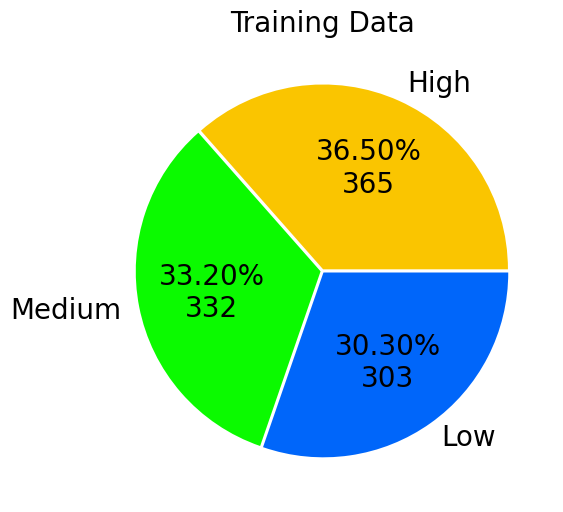

In [10]:
plt.figure(figsize=(6, 6))
plt.title('Training Data', fontsize=20)
plt.pie(df.level.value_counts(),
    labels=mapping.keys(),
    colors=['#FAC500','#0BFA00', '#0066FA','#FA0000'],
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(df.level.value_counts() /100)),
    explode=tuple(0.01 for i in range(3)),
    textprops={'fontsize': 20}
)
plt.show()

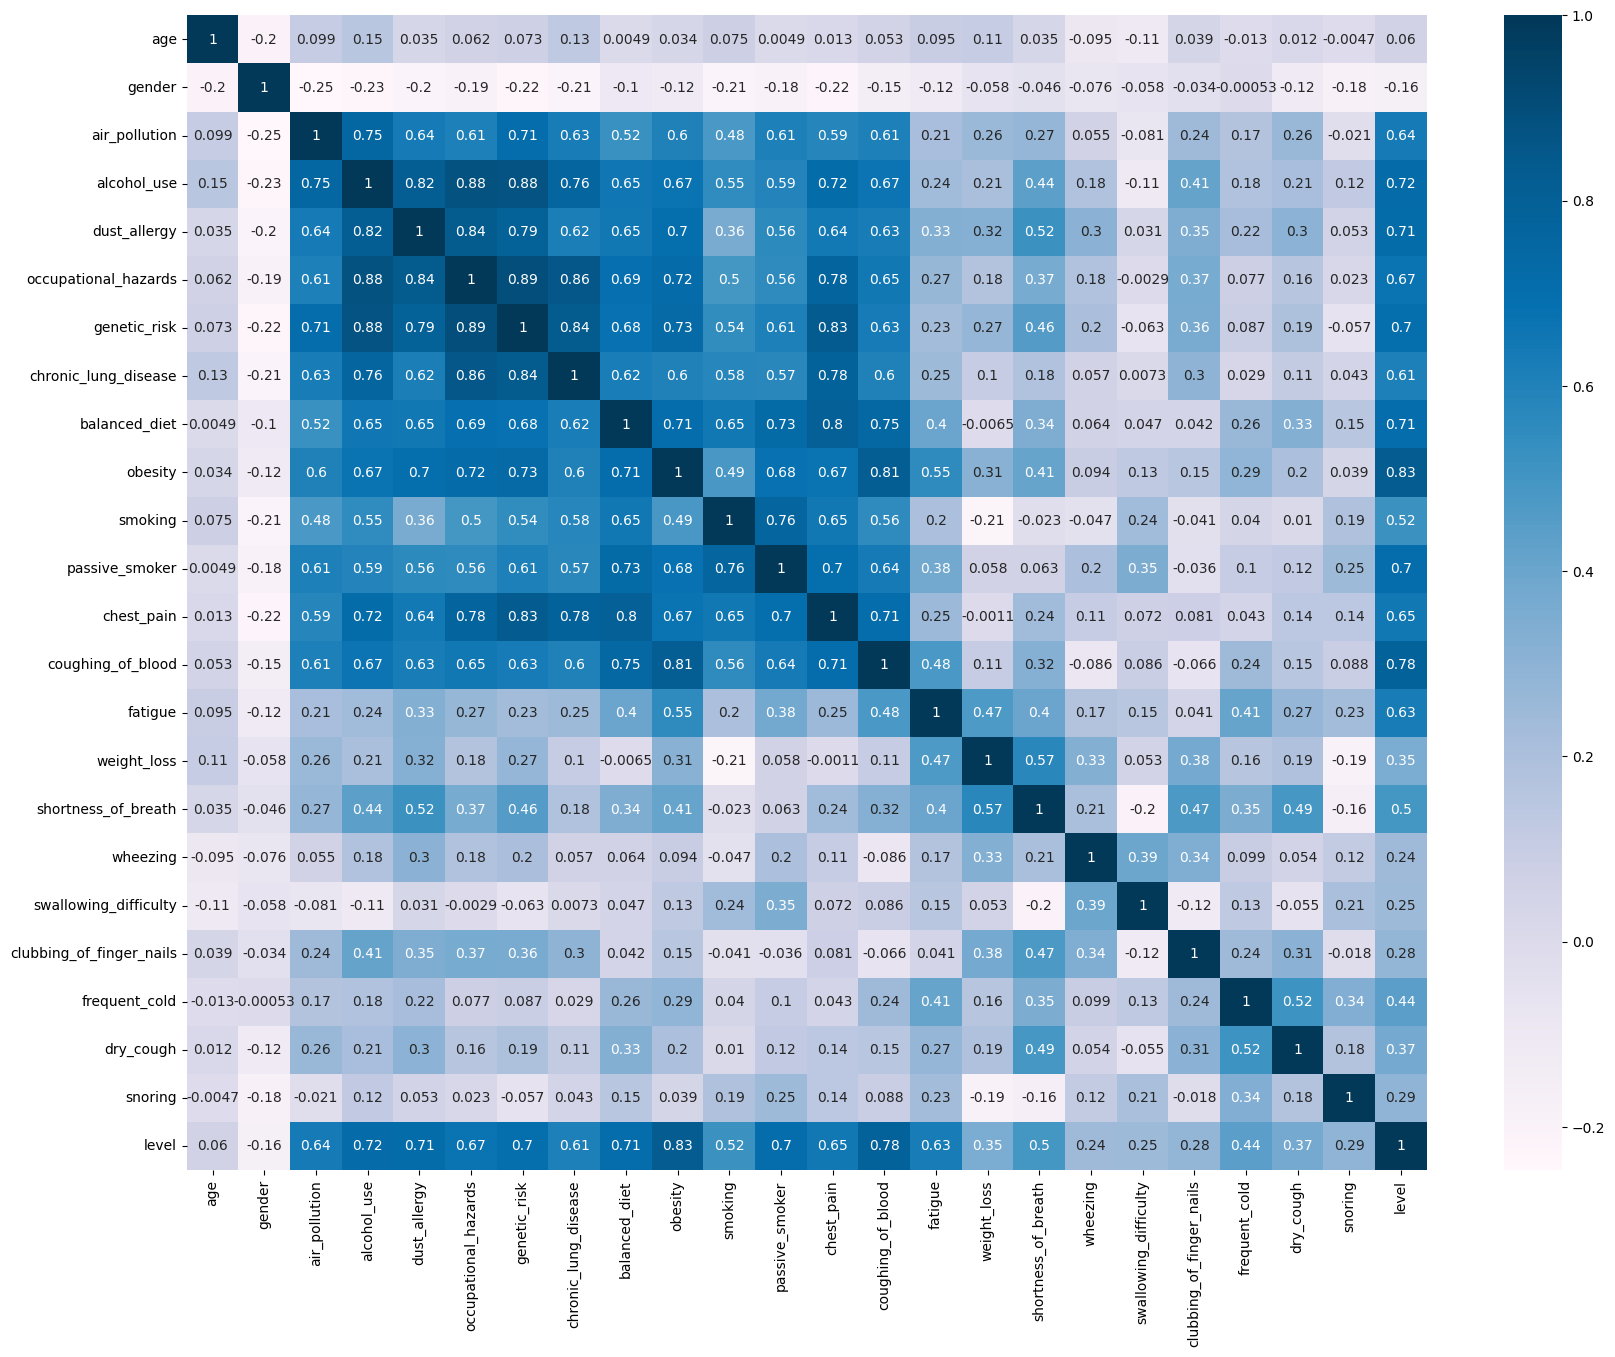

In [11]:
# Correlation plot
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

In [12]:
# Colors
colors = ['lightcoral','brown','lightseagreen','maroon','deeppink','darkorange',
          'royalblue','darkviolet', 'gold', 'crimson','lightsteelblue','salmon',
          'mediumseagreen','olivedrab','blue', 'limegreen',
          'slateblue','red','steelblue','teal','peru','dimgray','violet','cyan']

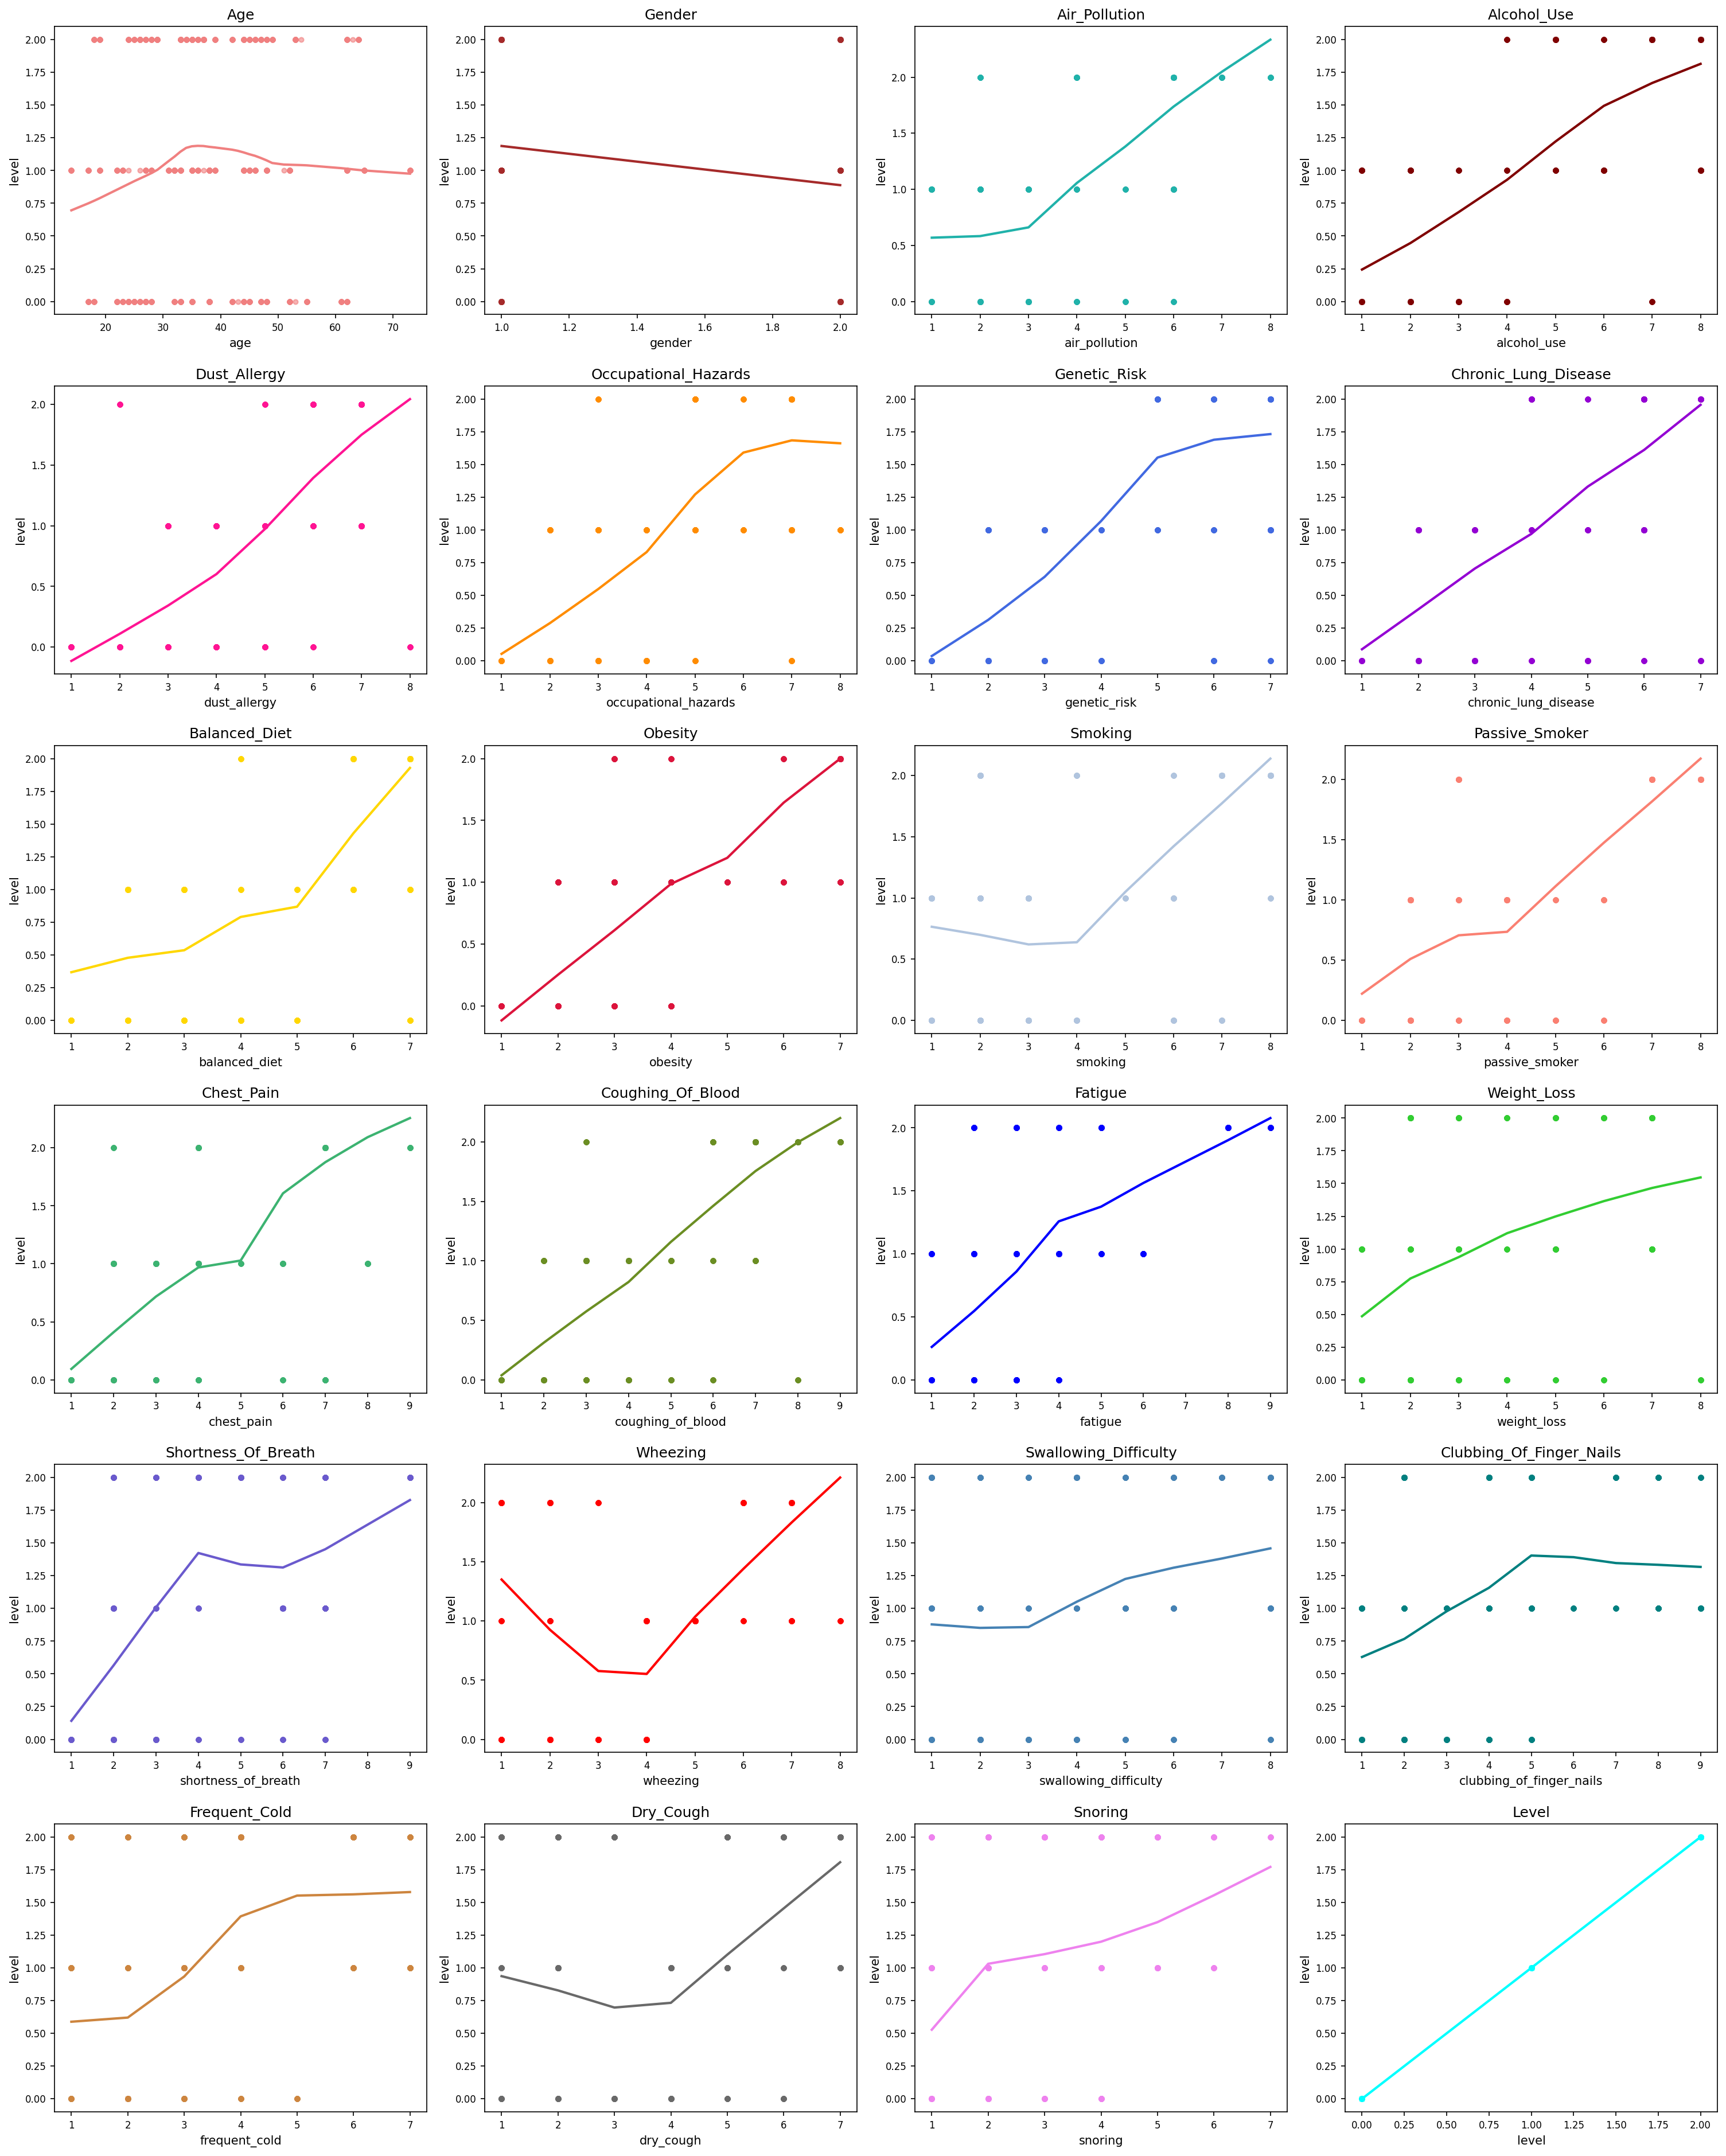

In [13]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 25), dpi=150)
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.regplot(x=col, y='level', data=df, lowess=True, color=colors[i], ax=ax[i],
                scatter_kws={'s': 15, 'alpha': 0.6}, line_kws={'lw': 2})
    ax[i].set_title(col.title(), fontsize=12)
    ax[i].tick_params(axis='x', labelsize=8)
    ax[i].tick_params(axis='y', labelsize=8)

plt.tight_layout(pad=0.5, w_pad=1, h_pad=1.5)
plt.show()


<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3726015039.py:12: SyntaxWarning: invalid escape sequence '\m'
  label=f'$\mu={mu:.1f}$\n$\sigma={sigma:.1f}$')
/tmp/ipython-input-3726015039.py:12: SyntaxWarning: invalid escape sequence '\s'
  label=f'$\mu={mu:.1f}$\n$\sigma={sigma:.1f}$')


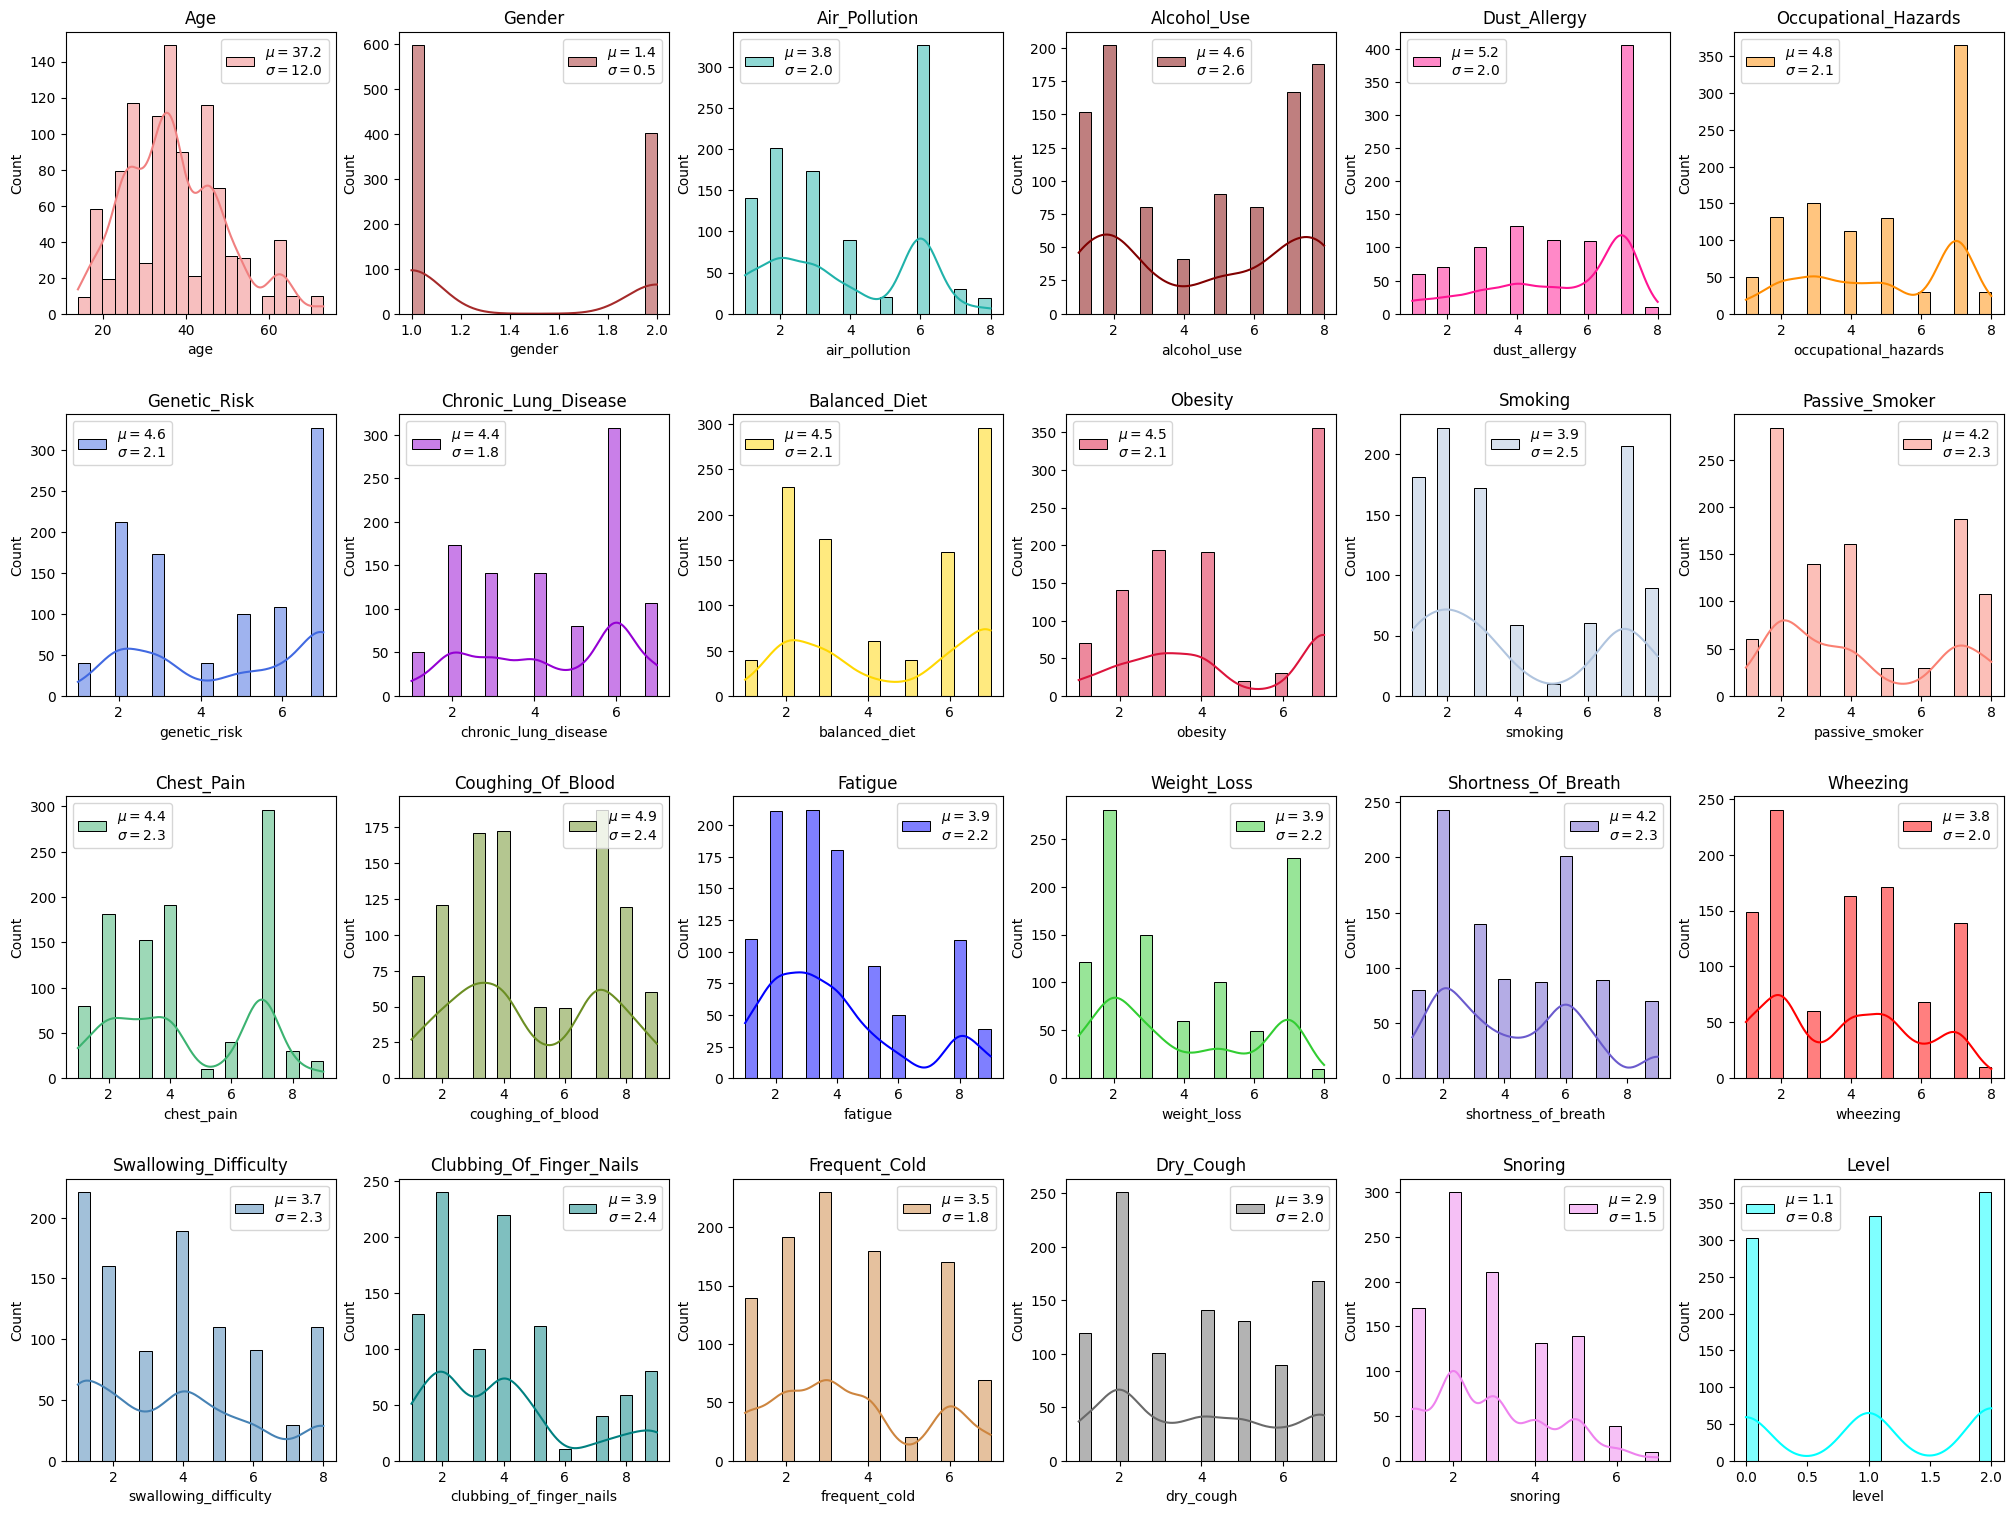

In [14]:
fig, ax = plt.subplots(ncols=6, nrows=4, figsize=(20, 15))
ax = ax.flatten()
i = 0

for k, v in df.items():
    mu, sigma = norm.fit(v)
    sns.histplot(v,
                 kde=True,
                 bins=20,
                 color=colors[i],
                 ax=ax[i],
                 label=f'$\mu={mu:.1f}$\n$\sigma={sigma:.1f}$')
    ax[i].set_title(f'{k.title()}')
    ax[i].legend()
    i += 1

plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(f'Shapes - X Training: {X_train.shape} and X Testing {X_test.shape}')
print(f'Shapes - Y Training: {y_train.shape} and Y Testing {y_test.shape}')

print(f'\nTraining output counts\n{y_train.value_counts()}')

Shapes - X Training: (800, 23) and X Testing (200, 23)
Shapes - Y Training: (800,) and Y Testing (200,)

Training output counts
level
2    279
1    274
0    247
Name: count, dtype: int64


In [16]:
from sklearn.preprocessing import StandardScaler
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_percent(model, X_test, y_test, model_name="Model"):
    # Predict labels
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    labels = np.unique(y_test)   # automatically detect all classes
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Convert to percentages row-wise
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(cm_percent, cmap=plt.cm.Blues)

    # Set axes labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Annotate each cell
    for i in range(len(labels)):
        for j in range(len(labels)):
            ax.text(j, i, f"{cm_percent[i, j]:.1f}%",
                    ha="center", va="center",
                    color="white" if cm_percent[i, j] > 50 else "black")

    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_title(f"Confusion Matrix - {model_name}")
    plt.colorbar(im, ax=ax)
    plt.show()


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
}

Logistic Regression Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        86

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



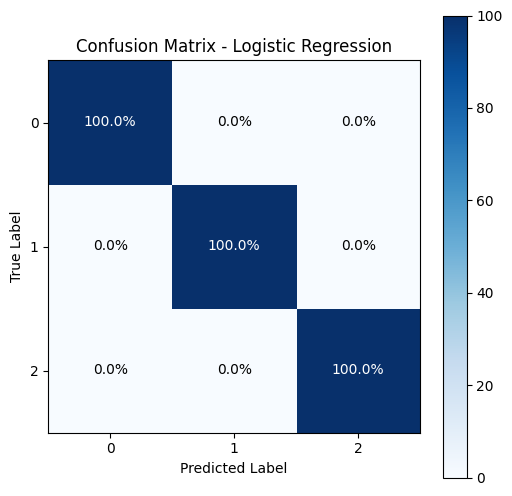

In [19]:
lr_model = models["Logistic Regression"]
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("Logistic Regression Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_lr)))
print(classification_report(y_test, y_pred_lr))
plot_confusion_matrix_percent(lr_model, X_test_scaled, y_test, model_name="Logistic Regression")

SVM Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        86

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



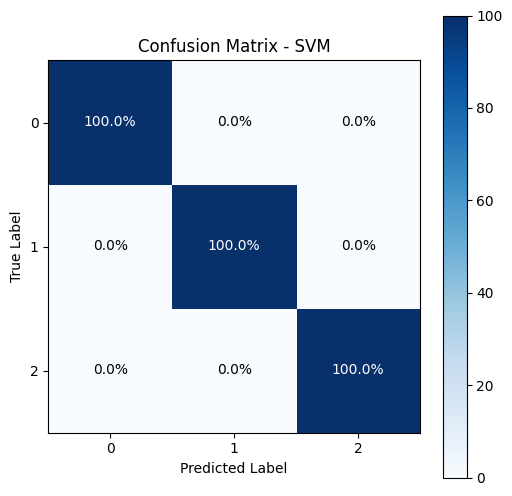

In [20]:
svm_model = models["SVM"]
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print("SVM Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_svm)))
print(classification_report(y_test, y_pred_svm))
plot_confusion_matrix_percent(svm_model, X_test_scaled , y_test, model_name="SVM")


Random Forest Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        86

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



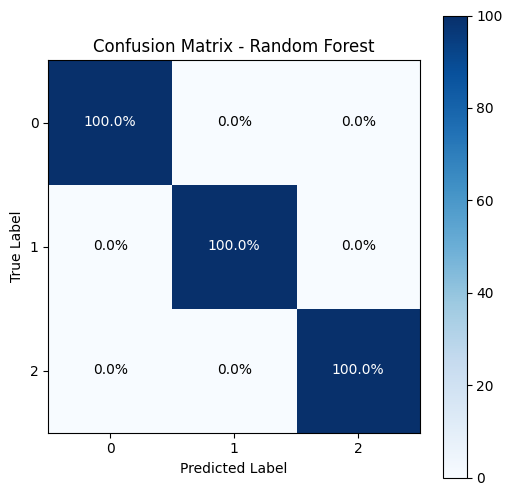

In [21]:
rf_model = models["Random Forest"]
rf_model.fit(X_train_scaled , y_train)
y_pred_rf = rf_model.predict(X_test_scaled )

print("Random Forest Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_rf)))
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix_percent(rf_model, X_test_scaled, y_test, model_name="Random Forest")

Naive Bayes Accuracy: 0.93
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.88      0.86      0.87        58
           2       0.91      0.94      0.93        86

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.93       200
weighted avg       0.93      0.93      0.93       200



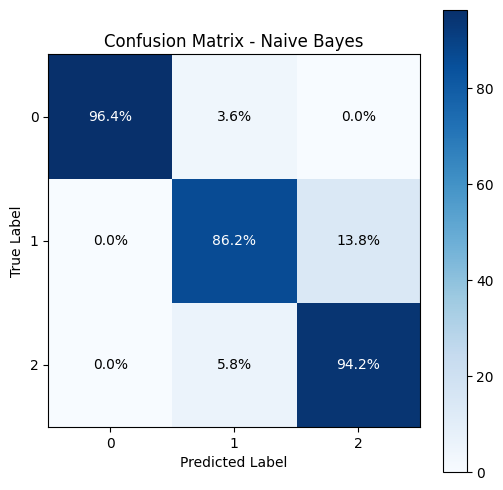

In [22]:
nb_model = models["Naive Bayes"]
nb_model.fit(X_train_scaled , y_train)
y_pred_nb = nb_model.predict(X_test_scaled )

print("Naive Bayes Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_nb)))
print(classification_report(y_test, y_pred_nb))
plot_confusion_matrix_percent(nb_model, X_test_scaled , y_test, model_name="Naive Bayes")

KNN Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        86

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



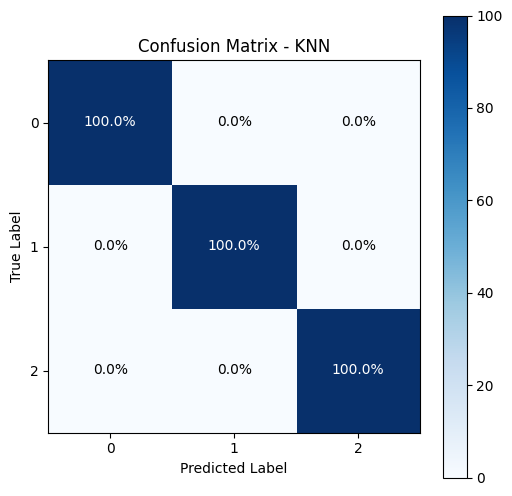

In [23]:
knn_model = models["KNN"]
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled )

print("KNN Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_knn)))
print(classification_report(y_test, y_pred_knn))
plot_confusion_matrix_percent(knn_model, X_test_scaled , y_test, model_name="KNN")

Decision Tree Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        86

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



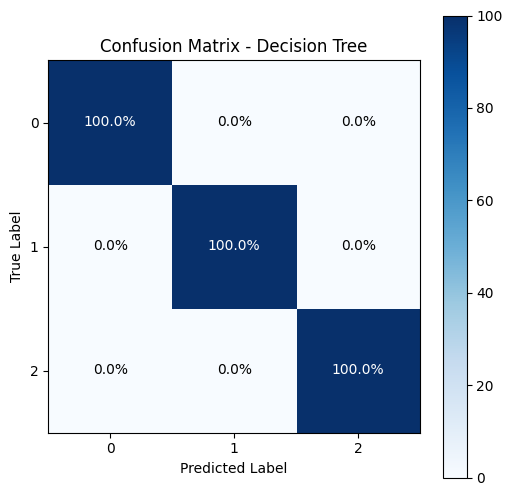

In [24]:
dt_model = models["Decision Tree"]
dt_model.fit(X_train_scaled , y_train)
y_pred_dt = dt_model.predict(X_test_scaled )

print("Decision Tree Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_dt)))
print(classification_report(y_test, y_pred_dt))
plot_confusion_matrix_percent(dt_model, X_test_scaled , y_test, model_name="Decision Tree")

Gradient Boosting Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        86

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



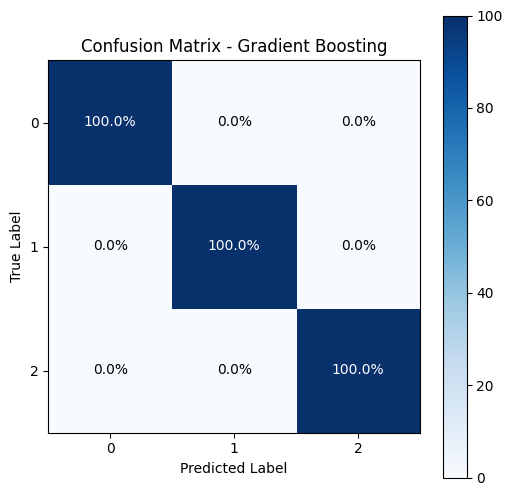

In [25]:
gb_model = models["Gradient Boosting"]
gb_model.fit(X_train_scaled , y_train)
y_pred_gb = gb_model.predict(X_test_scaled )

print("Gradient Boosting Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_gb)))
print(classification_report(y_test, y_pred_gb))
plot_confusion_matrix_percent(gb_model, X_test_scaled , y_test, model_name="Gradient Boosting")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:10:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        86

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



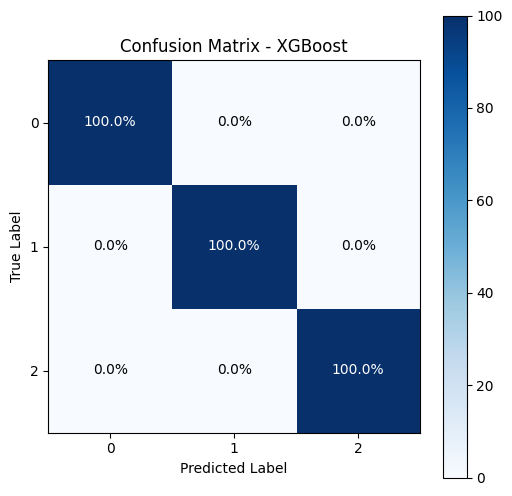

In [26]:
xgb_model = models["XGBoost"]
xgb_model.fit(X_train_scaled , y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("XGBoost Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_xgb)))
print(classification_report(y_test, y_pred_xgb))
plot_confusion_matrix_percent(xgb_model, X_test_scaled , y_test, model_name="XGBoost")

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import joblib

def evaluate_model(model, history_file, X_test, y_test, model_name="Model"):
    history = joblib.load(history_file)

    # Predict
    y_pred_prob = model.predict(X_test)

    # Handle binary or multi-class
    if y_pred_prob.ndim == 1 or y_pred_prob.shape[1] == 1:   # binary
        y_pred = (y_pred_prob > 0.5).astype(int).ravel()
        labels = [0,1]
    else:   # multi-class
        y_pred = np.argmax(y_pred_prob, axis=1)
        labels = list(range(y_pred_prob.shape[1]))   # [0,1,2]

    # Final test accuracy and loss
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{model_name} Final Test Loss: {loss:.2f}, Accuracy: {acc:.2f}")

    # Classification report
    print(f"\nClassification Report - {model_name}")
    print(classification_report(y_test, y_pred))

    # Confusion matrix with %
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Plot confusion matrix, accuracy & loss in a single row
    fig, axes = plt.subplots(1, 3, figsize=(18,5))

    # --- Confusion Matrix ---
    im = axes[0].imshow(cm_percent, cmap=plt.cm.Blues)
    axes[0].set_xticks(range(len(labels)))
    axes[0].set_yticks(range(len(labels)))
    axes[0].set_xticklabels(labels)
    axes[0].set_yticklabels(labels)

    # Annotate each cell with raw + %
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            text = f"{cm[i, j]}\n({cm_percent[i, j]:.1f}%)"
            axes[0].text(j, i, text, ha='center', va='center',
                         color='white' if cm_percent[i,j] > 50 else 'black')

    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("True")
    axes[0].set_title("Confusion Matrix")
    fig.colorbar(im, ax=axes[0])

    # --- Accuracy curve ---
    axes[1].plot(history['accuracy'], label='Train Accuracy')
    axes[1].plot(history['val_accuracy'], label='Validation Accuracy')
    axes[1].set_title("Accuracy")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Accuracy")
    axes[1].legend()

    # --- Loss curve ---
    axes[2].plot(history['loss'], label='Train Loss')
    axes[2].plot(history['val_loss'], label='Validation Loss')
    axes[2].set_title("Loss")
    axes[2].set_xlabel("Epochs")
    axes[2].set_ylabel("Loss")
    axes[2].legend()

    plt.suptitle(f"{model_name} Evaluation", fontsize=16)
    plt.tight_layout()
    plt.show()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4702 - loss: 1.6329 - val_accuracy: 0.7200 - val_loss: 0.6996
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7519 - loss: 0.6746 - val_accuracy: 0.7750 - val_loss: 0.5597
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7706 - loss: 0.5487 - val_accuracy: 0.7900 - val_loss: 0.4404
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8347 - loss: 0.4300 - val_accuracy: 0.8350 - val_loss: 0.4087
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8576 - loss: 0.3645 - val_accuracy: 0.8750 - val_loss: 0.3355
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8832 - loss: 0.3095 - val_accuracy: 0.8900 - val_loss: 0.2894
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9208 - loss: 0.2620 - val_accuracy: 0.8850 - val_loss: 0.2577
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9283 - loss: 0.2333 - val_accuracy: 0.8950 - val_loss

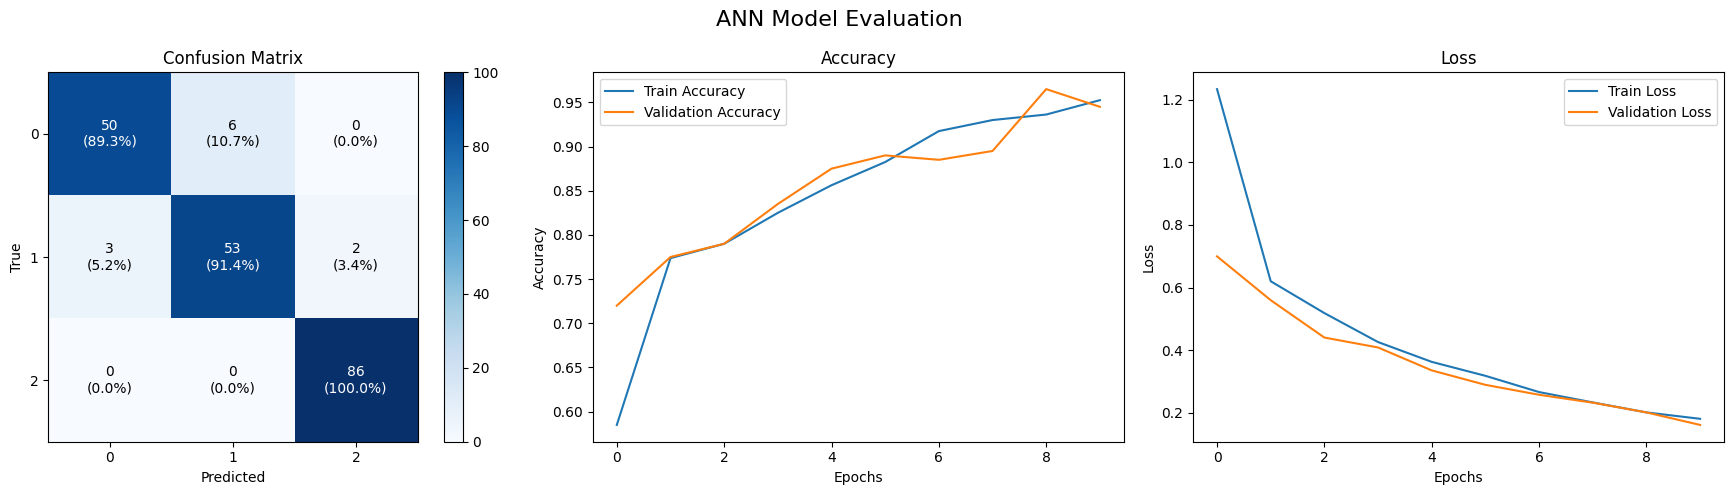

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
import joblib

# ================= ANN Model =================
ann_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # <-- Input layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')   # 3-class output
])

# Compile model
ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',   # integer labels 0,1,2
                  metrics=['accuracy'])

# Train the model
history = ann_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Save training history
joblib.dump(history.history, "ann_history.pkl")

# ================= Evaluate Model =================
evaluate_model(ann_model, "ann_history.pkl", X_test, y_test, model_name="ANN Model")


In [29]:
# ================= Reshape for CNN/LSTM/GRU =================
X_train_3d = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_3d = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4385 - loss: 1.1100 - val_accuracy: 0.8550 - val_loss: 0.6264
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7792 - loss: 0.6076 - val_accuracy: 0.8450 - val_loss: 0.4446
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8511 - loss: 0.3959 - val_accuracy: 0.8650 - val_loss: 0.3037
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9061 - loss: 0.2680 - val_accuracy: 0.9000 - val_loss: 0.2384
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9555 - loss: 0.2184 - val_accuracy: 0.9850 - val_loss: 0.1782
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9806 - loss: 0.1704 - val_accuracy: 0.9850 - val_loss: 0.1318
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9942 - loss: 0.1201 - val_accuracy: 0.9850 - val_loss: 0.1003
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9974 - loss: 0.0923 - val_accuracy: 1.0000 - val_loss

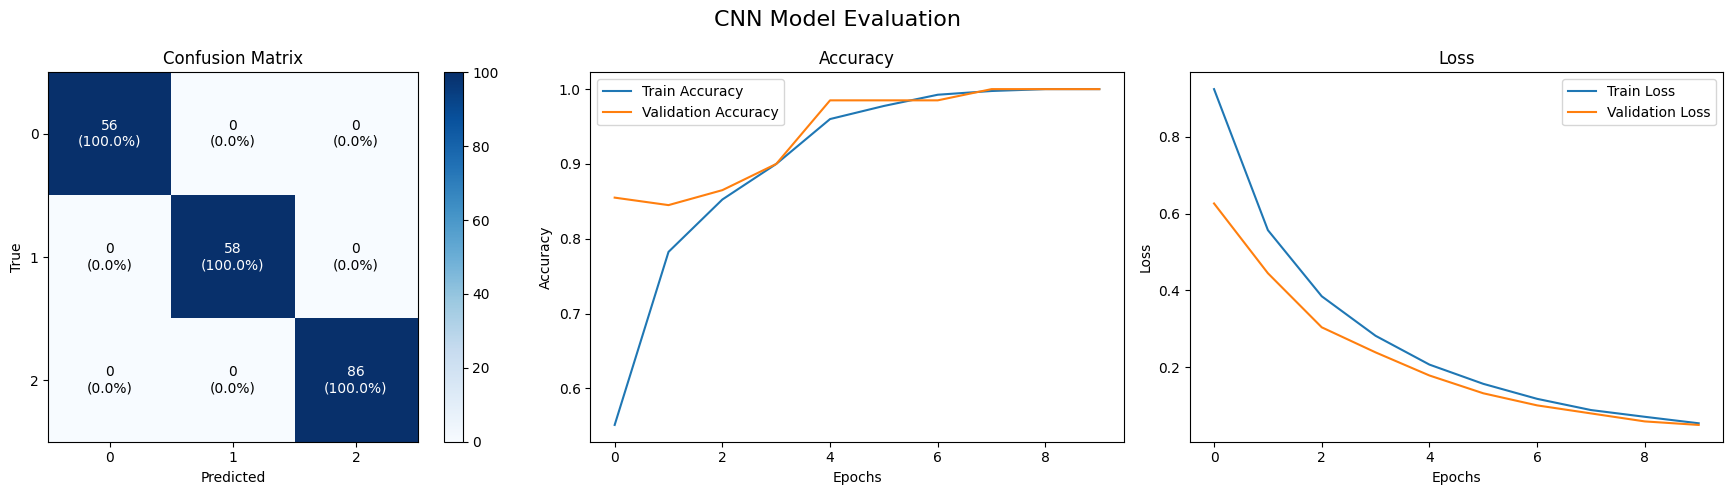

In [30]:
# ================= CNN =================
cnn_model = Sequential([
    Input(shape=(X_train_3d.shape[1], 1)),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_cnn = cnn_model.fit(X_train_3d, y_train, epochs=10, batch_size=32,
                            validation_data=(X_test_3d, y_test))
joblib.dump(history_cnn.history, "cnn_history.pkl")

evaluate_model(cnn_model, "cnn_history.pkl", X_test_3d, y_test, model_name="CNN Model")


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4057 - loss: 1.0788 - val_accuracy: 0.8600 - val_loss: 0.9042
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7967 - loss: 0.7598 - val_accuracy: 0.9600 - val_loss: 0.3867
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9137 - loss: 0.3472 - val_accuracy: 0.9900 - val_loss: 0.1547
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9627 - loss: 0.1800 - val_accuracy: 0.9900 - val_loss: 0.0868
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9727 - loss: 0.1148 - val_accuracy: 0.9900 - val_loss: 0.0617
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9753 - loss: 0.0850 - val_accuracy: 0.9900 - val_loss: 0.1012
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9833 - loss: 0.0739 - val_accuracy: 0.9900 - val_loss: 0.0491
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9642 - loss: 0.0887 - val_accuracy: 0.9900 - v

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
LSTM Model Final Test Loss: 0.03, Accuracy: 0.99

Classification Report - LSTM Model
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       1.00      1.00      1.00        58
           2       0.98      1.00      0.99        86

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



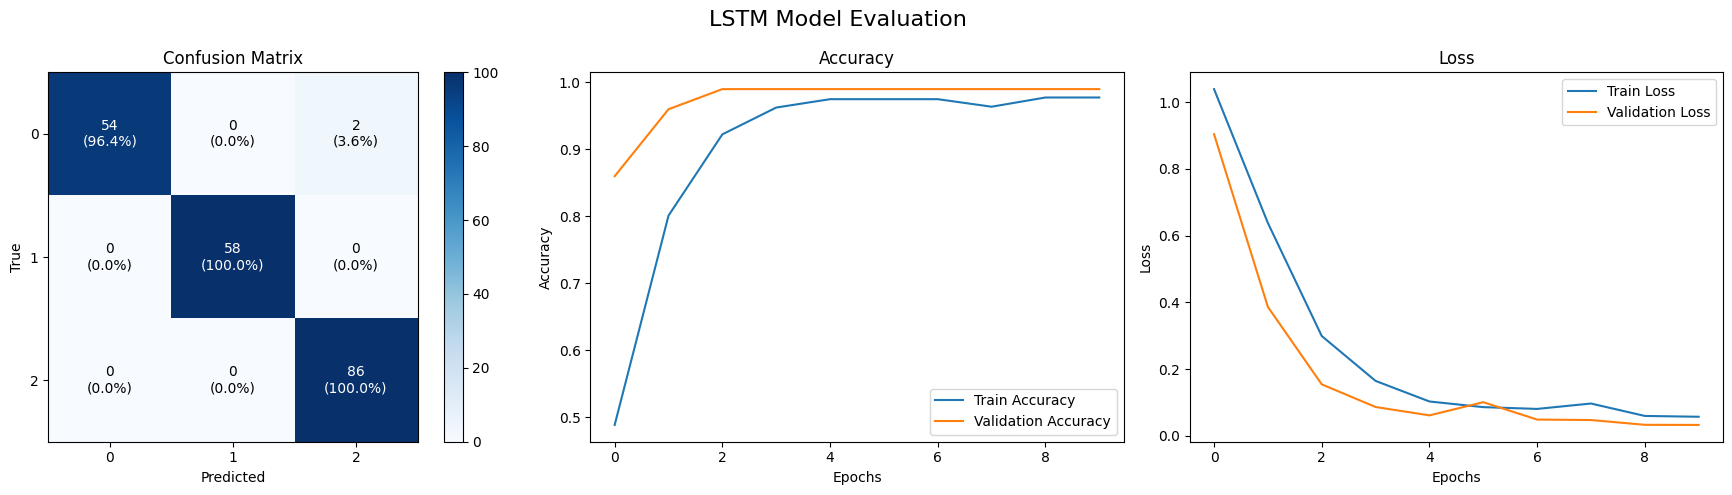

In [31]:
# ================= LSTM =================
lstm_model = Sequential([
    Input(shape=(X_train_3d.shape[1], 1)),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_lstm = lstm_model.fit(X_train_3d, y_train, epochs=10, batch_size=32,
                              validation_data=(X_test_3d, y_test))
joblib.dump(history_lstm.history, "lstm_history.pkl")

evaluate_model(lstm_model, "lstm_history.pkl", X_test_3d, y_test, model_name="LSTM Model")

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.4201 - loss: 1.0989 - val_accuracy: 0.7300 - val_loss: 0.7825
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7635 - loss: 0.6789 - val_accuracy: 0.8500 - val_loss: 0.3478
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9109 - loss: 0.3236 - val_accuracy: 0.9750 - val_loss: 0.1298
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9648 - loss: 0.1576 - val_accuracy: 0.9900 - val_loss: 0.0794
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9721 - loss: 0.0970 - val_accuracy: 0.9900 - val_loss: 0.0475
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9783 - loss: 0.0681 - val_accuracy: 0.9900 - val_loss: 0.0352
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9771 - loss: 0.0646 - val_accuracy: 0.9700 - val_loss: 0.0724
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9687 - loss: 0.0710 - val_accuracy: 0.9900 - v

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
BiLSTM Model Final Test Loss: 0.01, Accuracy: 1.00

Classification Report - BiLSTM Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        86

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



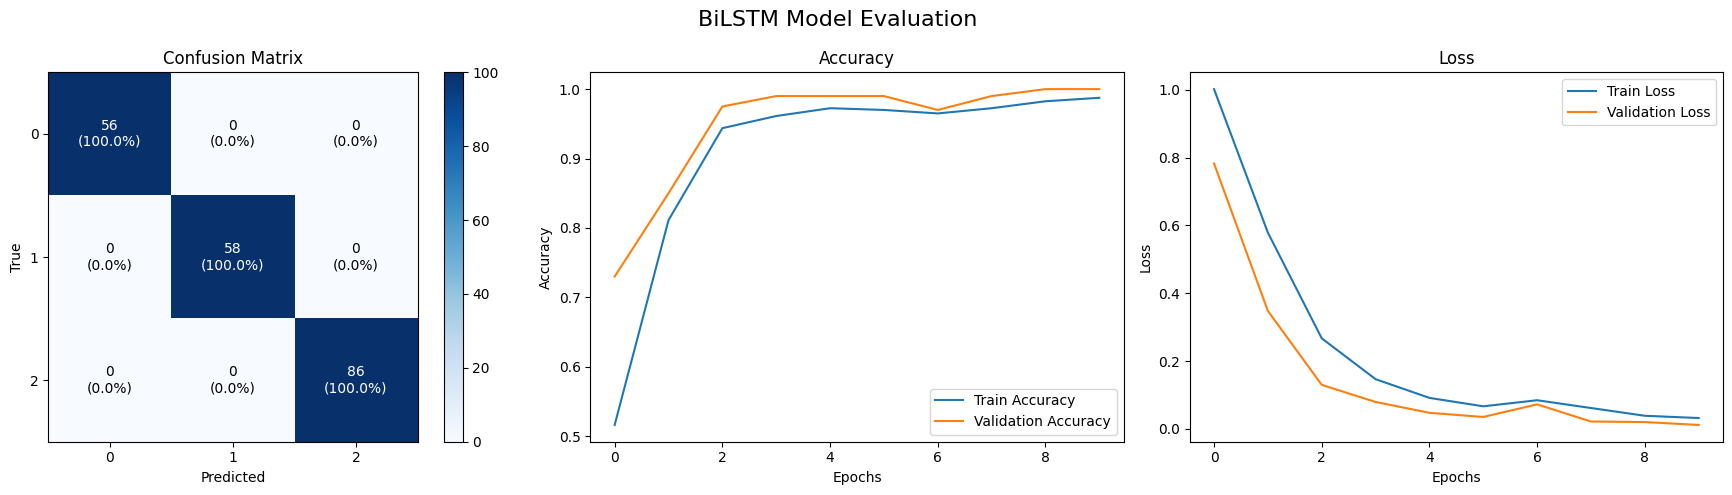

In [32]:
# ================= BiLSTM =================
bilstm_model = Sequential([
    Input(shape=(X_train_3d.shape[1], 1)),
    Bidirectional(LSTM(64)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_bilstm = bilstm_model.fit(X_train_3d, y_train, epochs=10, batch_size=32,
                                  validation_data=(X_test_3d, y_test))
joblib.dump(history_bilstm.history, "bilstm_history.pkl")

evaluate_model(bilstm_model, "bilstm_history.pkl", X_test_3d, y_test, model_name="BiLSTM Model")


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3341 - loss: 1.1230 - val_accuracy: 0.4300 - val_loss: 1.0348
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3422 - loss: 1.0573 - val_accuracy: 0.4500 - val_loss: 0.9884
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4208 - loss: 0.9794 - val_accuracy: 0.6950 - val_loss: 0.8241
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7298 - loss: 0.8185 - val_accuracy: 0.8450 - val_loss: 0.4879
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8507 - loss: 0.4967 - val_accuracy: 0.9750 - val_loss: 0.2745
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9482 - loss: 0.2700 - val_accuracy: 0.9500 - val_loss: 0.1591
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9499 - loss: 0.1883 - val_accuracy: 0.9850 - val_loss: 0.1085
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9803 - loss: 0.1044 - val_accuracy: 0.9900 - v

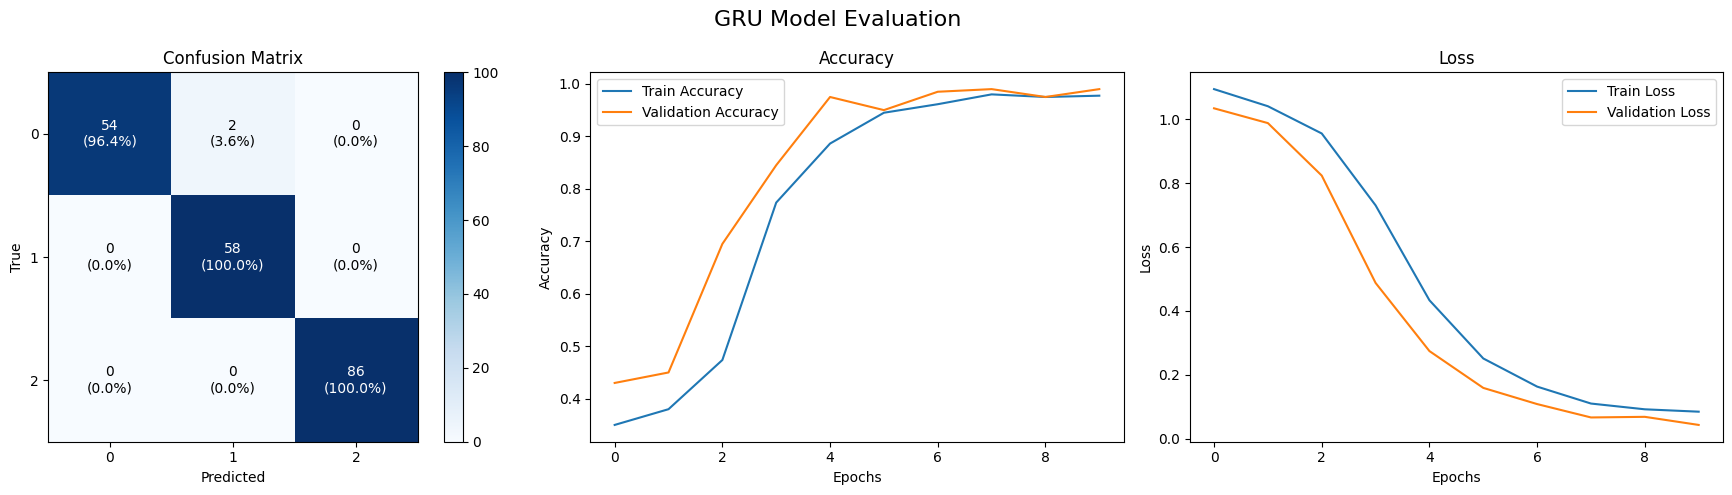

In [33]:
# ================= GRU =================
gru_model = Sequential([
    Input(shape=(X_train_3d.shape[1], 1)),
    GRU(64),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_gru = gru_model.fit(X_train_3d, y_train, epochs=10, batch_size=32,
                            validation_data=(X_test_3d, y_test))
joblib.dump(history_gru.history, "gru_history.pkl")
evaluate_model(gru_model, "gru_history.pkl", X_test_3d, y_test, model_name="GRU Model")
